<h1>Análisis del precío de la vivienda en Barcelona</h1>

In [2]:
#Importación de librerías
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
#Importamos el dataframe
df = pd.read_csv("Barcelona_Idealista.csv")
df[df['area_m2']<25]

,id,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
2336,2336,Barcelona,Sants-Montjuïc,el Poble Sec - AEI Parc de Montjuïc,needs refurb,Flat,1,20,Yes,interior,ground floor,89500
2544,2544,Barcelona,Sants-Montjuïc,Hostafrancs,needs refurb,Flat,1,20,No,exterior,mezzanine,100000
2887,2887,Barcelona,Sants-Montjuïc,Hostafrancs,needs refurb,Flat,1,20,No,interior,floor 1,90000


## Precio medio de las casas
Como podemos observar el barrio más caro es el de Sarría-Sant Gervasi con el precio medio superior al millón de euros, seguido Les Corts que tienen un precio aproximado del millón de euros, después el 3.er barrio más caro para vivir l'Eixample con precio medio de 600.000 € por vivienda como podemos ver el 3.er barrio más caro está casi a la mitad de precio que los 2 primeros. <br>
Los siguientes 3 barrios que son Ciutat Vella, Sant Martí, Gràcia se irán a los 400.000 € por vivienda. En las posiciones mas bajas tenemos a Horta-Guinardó, Sans-Montjuic, Sant Andreu que el precio de la vivienda estaría alrededor de los 300.000 € y por último tenemos a nou barris que el precio medio de la vivienda estaría alrededor de los 200.000 €

Text(0.5, 0, 'Distritos')

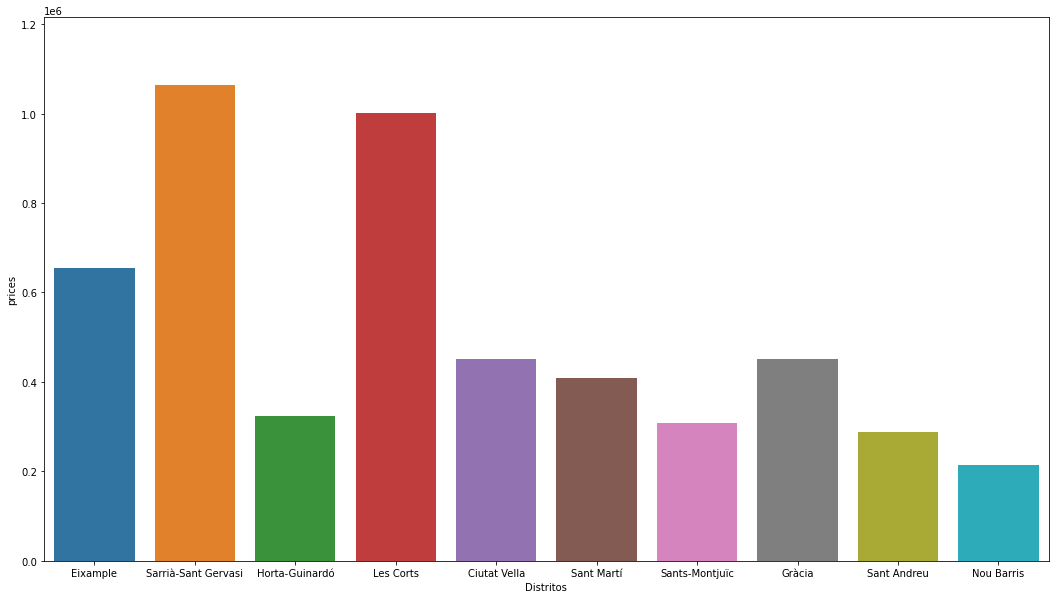

In [5]:
plt.figure(figsize=(18,10))
sns.barplot(data=df,x='district',y='prices',errwidth=0)
plt.xlabel("Distritos")

Aquí podemos ver como las casas que tienen vistas al exterior son más caras en todos los barrios especialmente en los barrios más caros

Text(0.5, 0, 'Distritos')

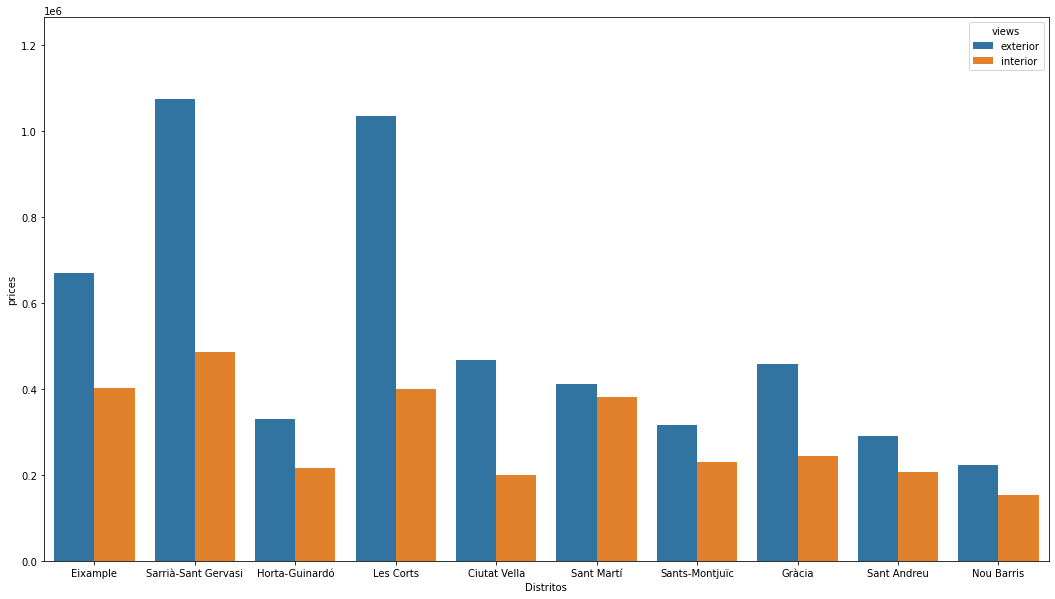

In [73]:
plt.figure(figsize=(18,10))
sns.barplot(data=df,x='district',y='prices',errwidth=0,hue='views')
plt.xlabel("Distritos")

Hemos podido ver como las viviendas que no tienen ascensor en los barrios caros son más caros debido a que el tipo de vivienda de casa tienen más metros cuadrados que los apartamentos que son las principales viviendas que tienen ascensor

In [71]:
df_caros=df[(df['district']=='Les Corts') | (df['district']=='Sarrià-Sant Gervasi')]
df_caros.groupby('type').count()

,id,city,district,neighborhood,condition,rooms,area_m2,lift,views,floor,prices
type,,,,,,,,,,,
Detached,34,34,34,34,34,34,34,34,34,34,34
Duplex,27,27,27,27,27,27,27,27,27,27,27
Flat,585,585,585,585,585,585,585,585,585,585,585
House,43,43,43,43,43,43,43,43,43,43,43
Penthouse,80,80,80,80,80,80,80,80,80,80,80
Semi-detached,5,5,5,5,5,5,5,5,5,5,5
Terraced,2,2,2,2,2,2,2,2,2,2,2


<h3>Precio medio del m2</h3>
Ahora haremos veremos la correlación que tiene el precio de la casa con los m2 haciendo un plot de regresión lineal que veremos que los 50m2 están a 200.000€ eso haria una media de 1.000.000/200=5000€ el m2



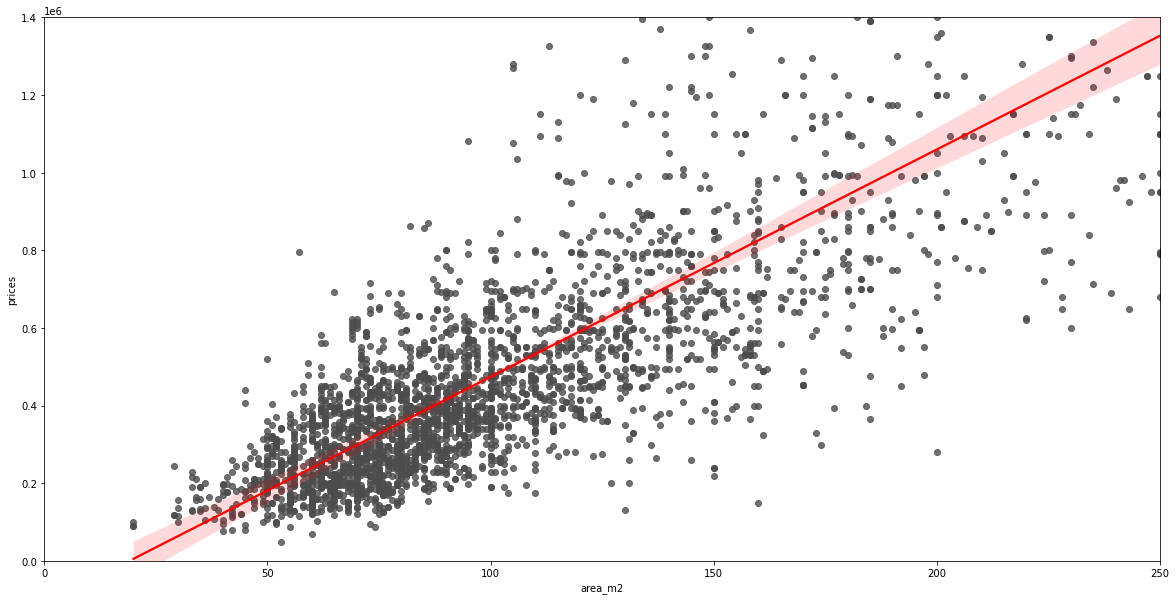

In [102]:
plt.figure(figsize=(20,10))
sns.regplot(data=df,x='area_m2',y='prices',color=".3",line_kws=dict(color="r"))
plt.xlim(0,250)
plt.ylim(0,1400000)
plt.xlabel='m2'
plt.ylabel='Precios'

In [125]:
#Hacemos el cálculo del precio del m2
precio_medio=df['prices'].mean()/df['area_m2'].mean()
precio_medio

4939.020215915246

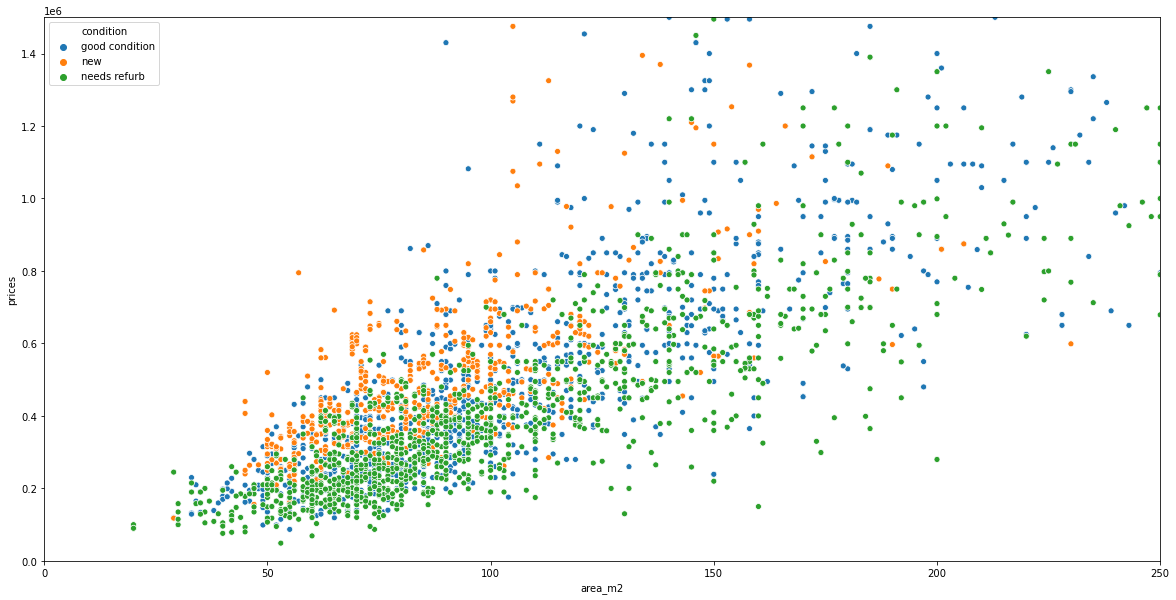

In [128]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='area_m2',y='prices',color=".3",hue='condition')
plt.xlim(0,250)
plt.ylim(0,1500000)
plt.xlabel='m2'
plt.ylabel='Precios'

In [72]:
df_caros.groupby('type').mean()

,id,rooms,area_m2,prices
type,,,,
Detached,1275.941176,5.294118,382.088235,1.940059e+06
Duplex,1475.481481,3.814815,228.407407,1.297685e+06
Flat,1648.411966,3.666667,149.304274,8.175156e+05
House,1057.302326,5.720930,464.139535,2.921744e+06
Penthouse,1661.912500,3.587500,189.000000,1.155912e+06
Semi-detached,1260.200000,4.600000,287.600000,1.606000e+06
Terraced,1609.500000,5.000000,427.500000,1.892500e+06


In [39]:
pd.unique(df.district)

array(['Eixample', 'Sarrià-Sant Gervasi', 'Horta-Guinardó', 'Les Corts',
       'Ciutat Vella', 'Sant Martí', 'Sants-Montjuïc', 'Gràcia',
       'Sant Andreu', 'Nou Barris'], dtype=object)

In [31]:
#Función para hacer un diccionario con un número los tipos únicos de cada columna
def conversion(diccionario,lista):
    for i in range(len(neighborhood)):
        Dictneighborhood.update({i:neighborhood[i]}) 
#Inicializamos los diccionarios        
Dictneighborhood = {}
DictDistrict = {}
DictCondition={}
DictType={}
DictFloor={}
#Hago un array de los tipos únicos que hay en cada columna 
neighborhood=pd.unique(df.neighborhood)
district=pd.unique(df.district)
condition=pd.unique(df.condition) 
Type=pd.unique(df.Type)
floors=pd.unique(df.floors)
#Llamos a la función conversión
conversion(Dictneighborhood,neighborhood)
conversion(DictDistrict,district)
conversion(DictCondition,condition)
conversion(DictType,Type)
conversion(DictFloor,floors)

{0: "la Dreta de l'Eixample", 1: 'Sant Gervasi - Galvany', 2: 'Sant Antoni', 3: 'Can Baró', 4: 'el Fort Pienc', 5: 'la Sagrada Família', 6: "la Nova Esquerra de l'Eixample", 7: 'Pedralbes', 8: 'Sant Pere - Santa Caterina i la Ribera', 9: 'el Guinardó', 10: "l'Antiga Esquerra de l'Eixample", 11: 'el Poblenou', 12: 'les Corts', 13: 'Sant Gervasi - la Bonanova', 14: 'el Poble Sec - AEI Parc de Montjuïc', 15: 'el Barri Gòtic', 16: 'la Vila de Gràcia', 17: 'el Congrés i els Indians', 18: 'la Vila Olímpica del Poblenou', 19: 'Sant Martí de Provençals', 20: 'el Clot', 21: "el Camp de l'Arpa del Clot", 22: 'la Bordeta', 23: "el Camp d'en Grassot i Gràcia Nova", 24: 'Sarrià', 25: 'el Carmel', 26: 'la Maternitat i Sant Ramon', 27: 'el Putxet i el Farró', 28: 'el Raval', 29: 'Vallvidrera - el Tibidabo i les Planes', 30: 'les Tres Torres', 31: 'el Besòs i el Maresme', 32: "la Font d'en Fargues", 33: 'Provençals del Poblenou', 34: 'Vallcarca i els Penitents', 35: 'Diagonal Mar i el Front Marítim de

In [34]:
#Eliminamos las celdas que son formato string menos la de lift
df.drop(['id','city',],axis=1,inplace=True)
df.head(5)

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000


In [ ]:
#Cambiamos los valores de la columna lift de string a booleano
df['lift']=df['lift'].map({
    'Yes':1,
    'No':0
})
df['views']=df['exterior'].map({
    'exterior':1,
    'interior':0
})
df.head(5)

,rooms,area_m2,lift,prices
0,3,351,1,2300000
1,5,298,1,1750000
2,2,90,1,590000
3,2,130,1,450000
4,3,110,0,430000


In [ ]:
#usaremos el modelo de regresión lineal para predecir el precio de una casa
reg = linear_model.LinearRegression()
reg.fit(df.drop('prices',axis='columns'),df.prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Ahora hacemos una predicción para comprobar como funciona, la primera casilla es el número de habitaciones
#la segunda casilla son los m2 de la vivienda y la Tercera un booleano de si tiene ascensor
reg.predict([[4,120,1]])

array([552005.25990284])

<h5> Exportamos el modelo </h5>

In [ ]:
from sklearn.externals import joblib
joblib.dump(reg, 'modelo_predecir_vivenda_BCN')

['modelo_predecir_vivenda_BCN']